In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

dat = pd.read_csv('data/health care diabetes.csv')

In [2]:
dat = dat[dat['Glucose'] != 0]
dat = dat[dat['BloodPressure'] != 0]
dat = dat[dat['SkinThickness'] != 0]
dat = dat[dat['Insulin'] != 0]
dat = dat[dat['BMI'] != 0]
dat = dat[dat['DiabetesPedigreeFunction'] != 0]
dat = dat[dat['Age'] != 0]

---

## Correlation:

Ignore the fact that I created a copy of our data in the PCA analysis. I think it would be easier to use the 'dat' dataset that Daniella created to do the correlation! - Phoebe 

In [3]:
# correlation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


for feature_name in dat.columns:
    if feature_name == 'Outcome':
        continue  
    
    X = dat[[feature_name]]  
    y = dat['Outcome'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Feature: {feature_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print()

Feature: Pregnancies
Mean Squared Error: 0.22
R^2 Score: 0.04

Feature: Glucose
Mean Squared Error: 0.18
R^2 Score: 0.20

Feature: BloodPressure
Mean Squared Error: 0.22
R^2 Score: 0.02

Feature: SkinThickness
Mean Squared Error: 0.21
R^2 Score: 0.08

Feature: Insulin
Mean Squared Error: 0.23
R^2 Score: -0.04

Feature: BMI
Mean Squared Error: 0.20
R^2 Score: 0.09

Feature: DiabetesPedigreeFunction
Mean Squared Error: 0.21
R^2 Score: 0.07

Feature: Age
Mean Squared Error: 0.19
R^2 Score: 0.15



Seems to me like age and gluecose are better predictors? 

---


## PCA Analysis

I made a copy of the data to change the Outcome from '0' and '1' to 'No' and 'Yes' because that's just easier to plot. - Phoebe

In [4]:
dat_new = dat.copy()

In [5]:
dat_new['Outcome'] = dat_new['Outcome'].replace({0: 'No', 1: 'Yes'})
dat_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
6,3,78,50,32,88,31.0,0.248,26,Yes
8,2,197,70,45,543,30.5,0.158,53,Yes
13,1,189,60,23,846,30.1,0.398,59,Yes
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,Yes
755,1,128,88,39,110,36.5,1.057,37,Yes
760,2,88,58,26,16,28.4,0.766,22,No
763,10,101,76,48,180,32.9,0.171,63,No


In [6]:
# setting features and target
X = dat.loc[:, 'Pregnancies':'Age']
y = dat['Outcome']

In [7]:
pca = PCA(n_components = 2)

In [8]:
X_pca = pca.fit_transform(X)

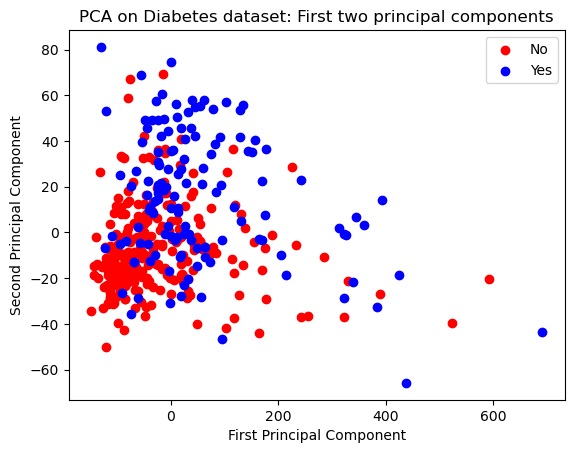

In [9]:
# Scatter plot of the first two principal components
# with color coding for Diabetic outcome

colors = ['red', 'blue']
diabetes = dat_new['Outcome'].unique()

for i, color, outcome_type in zip(range(2), colors, diabetes):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=color, label=outcome_type)
    
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("PCA on Diabetes dataset: First two principal components")
plt.show()

In [10]:
correlation_with_target = dat.corr()['Outcome'].drop('Outcome')

# Print the correlation values
print(correlation_with_target)

Pregnancies                 0.256566
Glucose                     0.515703
BloodPressure               0.192673
SkinThickness               0.255936
Insulin                     0.301429
BMI                         0.270118
DiabetesPedigreeFunction    0.209330
Age                         0.350804
Name: Outcome, dtype: float64
